In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:

# hyper tuning

batch_size=4
learning_rate=0.01
num_epoch=4



transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])


train_dataset=torchvision.datasets.CIFAR10(root="./",download=False,train=True, transform=transform)

test_dataset=torchvision.datasets.CIFAR10(root="./",download=False,train=False, transform=transform)


train_loader=DataLoader(dataset=train_dataset,shuffle=True,batch_size=batch_size)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size)


In [78]:
classes=["aiplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

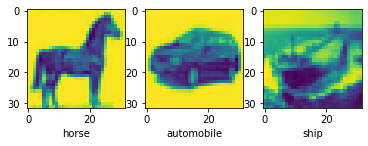

In [79]:
example=iter(train_loader)

img,label=example.next()

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(img[i][0])
    plt.xlabel(classes[label[i]])
plt.show()

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.maxpool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10) 
        self.relu=F.relu
        
    def forward(self,x):
        x=self.maxpool(self.relu(self.conv1(x)))
        x=self.maxpool(self.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [5]:
num_epoch=10

In [8]:
obj=CNN()

criterion=nn.CrossEntropyLoss()
optimiser=torch.optim.SGD(obj.parameters(),lr=learning_rate)

for epoch in range(num_epoch):
    for i,(images,labels) in enumerate(train_loader):
        
        images=images
        labels=labels
        
        
        output=obj.forward(images)
        
        loss=criterion(output,labels)
        
        optimiser.zero_grad()
        
        loss.backward()
        optimiser.step()
        
    
    print(f"EPOCH[{epoch+1}/{num_epoch}]     LOSS {loss.item()}")

EPOCH[1/10]     LOSS 2.30511736869812
EPOCH[2/10]     LOSS 1.9410134553909302
EPOCH[3/10]     LOSS 0.6971940994262695
EPOCH[4/10]     LOSS 0.5645690560340881
EPOCH[5/10]     LOSS 0.4902132749557495
EPOCH[6/10]     LOSS 2.155724048614502
EPOCH[7/10]     LOSS 0.3579627275466919
EPOCH[8/10]     LOSS 1.3607761859893799
EPOCH[9/10]     LOSS 1.2596313953399658
EPOCH[10/10]     LOSS 1.0908218622207642


In [41]:
obj.eval()

prediction_array=[0]*10
class_count=[0]*10
total=0

for images,labels in test_loader:
    
    images=images
    labels=labels
    
    output=obj.forward(images)
    
    _,predict=torch.max(output,1)

    
    total+=labels.shape[0]
    
    for i in range(len(predict)):
        if predict[i]==labels[i]:
            prediction_array[labels[i]]+=1
        class_count[labels[i]]+=1
    
for i in range(len(class_count)):
    print(f"THE ACCURACY FOR LABEL  '{i}' IS  {prediction_array[i]/class_count[i]}%")


THE ACCURACY FOR LABEL  '0' IS  0.679%
THE ACCURACY FOR LABEL  '1' IS  0.751%
THE ACCURACY FOR LABEL  '2' IS  0.436%
THE ACCURACY FOR LABEL  '3' IS  0.434%
THE ACCURACY FOR LABEL  '4' IS  0.492%
THE ACCURACY FOR LABEL  '5' IS  0.525%
THE ACCURACY FOR LABEL  '6' IS  0.772%
THE ACCURACY FOR LABEL  '7' IS  0.793%
THE ACCURACY FOR LABEL  '8' IS  0.671%
THE ACCURACY FOR LABEL  '9' IS  0.652%


In [94]:

test_case=DataLoader(dataset=test_dataset,batch_size=100)

example=iter(test_case)

img,label=example.next()

def predictor(index):
    output=obj.forward(img[index])
    
    _,predicted=torch.max(torch.softmax(output,1),1)

    plt.imshow(img[index][0])
    plt.title(f"THE TRUTH IS    {classes[label[index]]}")
    plt.xlabel(f"THE PREDICTION IS    {classes[predicted.item()]}")
    plt.show()

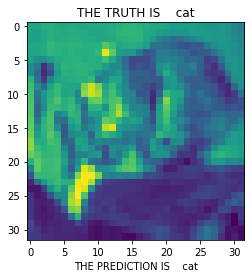

In [95]:
predictor(0)

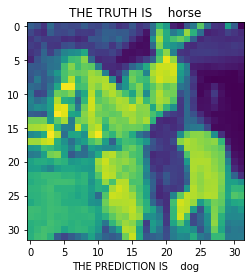

In [96]:
predictor(56)

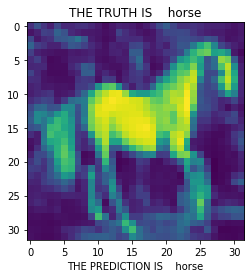

In [97]:
predictor(13)